# **LOGISTIC REGRESSION MODEL**

**IMPORT PACKAGES AND LIBRARIES**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score  #for the evaluation of the model
import pandas as pd
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

**1. LOAD THE DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#LOAD THREE DATASETS
data=pd.read_csv('/content/drive/MyDrive/thesiss/French.csv')

In [ ]:
data

,Fake,text,clean_with_stopwords,final_clean
0,0,Il tente d'incendier sa femme : elle est indem...,il tente de incendier son femme lui être indem...,tente incendier femme indemne gravement bruler...
1,0,"Ça y est, Renaud a fait son retour sur scène !...",cela y être renaud avoir faire son retour sur ...,etre renaud avoir faire retour scene octobre a...
2,0,"Avec son tailleur rouge, quel message a voulu ...",avec son tailleur rouge quel message avoir vou...,tailleur rouge message avoir vouloir envoyer h...
3,0,Foot-Ligue 1 : tous les résultats de la 8ème j...,foot ligue tout le résultat de le èm journée h...,foot ligue tout resultat eme journee octobre m...
4,0,× S'abonner au podcast \nVous pouvez vous abon...,se abonner au podcast vous pouvoir vous abonne...,abonner podcast pouvoir abonner telechargement...
...,...,...,...,...
27811,1,97% de Libanaises refaites : L’ONU demande au ...,pourcent de libanais refaire l onu demande au ...,pourcent libanais refaire onu demande liban ar...
27812,1,Un réfugié syrien humilie et empêche une famil...,un réfugié syrien humilier et empêche un famil...,refugier syrien humilier empeche famill rom tr...
27813,1,Mehdi Meklat lance une banane à Christiane Tau...,mehdi meklat lance un banane à christiane taub...,mehdi meklat lance banane christiane taubira a...
27814,1,"En visite en Afghanistan, Marine Le Pen refuse...",en visite en afghanistan marine le pen refuse ...,visite afghanistan marine pen refuse participe...


In [ ]:
data['Fake'].value_counts() #DISPLAY NUMBER OF FAKE AND TRUE NEWS

1    14487
0    13329
Name: Fake, dtype: int64

In [ ]:
data.shape

(27816, 4)

**COUNT THE Nº OF OCCURRENCES OF EACH TOKEN IN FAKE AND REAL PIECES NEWS**

In [ ]:
L = list(zip(data['Fake'], data['final_clean'])) # Create a list of tuples ('label','text')

In [ ]:
print(len(L))

27816


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import collections
from collections import Counter

true = []
fake = []
for k,v in L:
  if k == 1:
    fake.append(nltk.tokenize.word_tokenize(v))
  else: 
    true.append(nltk.tokenize.word_tokenize(v))

print(len(true))  
print(len(fake))


13329
14487


In [ ]:
trueList = [ item for elem in true for item in elem]
fakeList = [ item for elem in fake for item in elem]

In [ ]:
len(trueList)

3376999

In [ ]:
len(fakeList)

2579088

In [ ]:
def true_unigrams(trueList):
    uni_t = list(zip(trueList))
    print(collections.Counter(uni_t))

true_unigrams(trueList)

Counter({('avoir',): 92182, ('etre',): 45597, ('plus',): 29386, ('faire',): 22561, ('tout',): 19871, ('pouvoir',): 16107, ('premier',): 12260, ('deux',): 11549, ('comme',): 11489, ('aussi',): 10733, ('apres',): 10468, ('nouveau',): 10342, ('pourcent',): 10236, ('devoir',): 9579, ('octobre',): 9470, ('depuis',): 9023, ('autre',): 9001, ('aller',): 8809, ('france',): 8785, ('dernier',): 8466, ('jour',): 7897, ('entre',): 7738, ('mettre',): 7564, ('contre',): 7482, ('grand',): 7436, ('tres',): 7311, ('bien',): 7167, ('selon',): 6804, ('dire',): 6779, ('annee',): 6721, ('voir',): 6719, ('francais',): 6538, ('sans',): 6506, ('pari',): 6377, ('avant',): 6314, ('etat',): 6235, ('encore',): 6224, ('euro',): 5985, ('alors',): 5882, ('president',): 5864, ('heure',): 5769, ('passer',): 5711, ('prendre',): 5449, ('politique',): 5312, ('million',): 5276, ('monde',): 5254, ('pays',): 5230, ('personne',): 5218, ('quelque',): 5111, ('homme',): 4970, ('lors',): 4953, ('trois',): 4870, ('vouloir',): 480

In [ ]:
def fake_unigrams(fakeList):
    uni_f = list(zip(fakeList))
    print(collections.Counter(uni_f))

fake_unigrams(fakeList)

Counter({('avoir',): 73227, ('etre',): 45401, ('tout',): 26908, ('faire',): 26107, ('plus',): 25890, ('pouvoir',): 13503, ('comme',): 10613, ('aller',): 9637, ('bien',): 9107, ('apres',): 8257, ('france',): 8030, ('nouveau',): 7984, ('devoir',): 7974, ('tres',): 7451, ('dire',): 7332, ('plusieurs',): 7248, ('grand',): 7047, ('voir',): 6928, ('depuis',): 6877, ('sans',): 6871, ('autre',): 6818, ('francais',): 6697, ('premier',): 6593, ('leur',): 6184, ('mettre',): 5983, ('alors',): 5641, ('jour',): 5514, ('quand',): 5458, ('aussi',): 5418, ('encore',): 5351, ('vouloir',): 5315, ('petit',): 5279, ('monde',): 5168, ('prendre',): 5129, ('article',): 5061, ('groupe',): 5056, ('savoir',): 5035, ('proposer',): 5004, ('deux',): 4951, ('president',): 4837, ('passer',): 4765, ('donc',): 4738, ('bon',): 4718, ('peu',): 4688, ('dernier',): 4670, ('macron',): 4661, ('avant',): 4646, ('falloir',): 4583, ('quelque',): 4561, ('fois',): 4459, ('venir',): 4458, ('personne',): 4385, ('deja',): 4332, ('su

**MOST FREQUENT WORDS IN FAKE AND REAL NEWS**

In [ ]:
from wordcloud import WordCloud

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

*REAL NEWS*

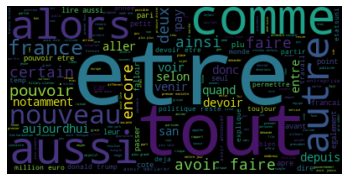

In [ ]:
import matplotlib.pyplot as plt

listToStr = ' '.join(map(str, trueList))
wordcloud = WordCloud().generate(listToStr)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*FAKE NEWS*

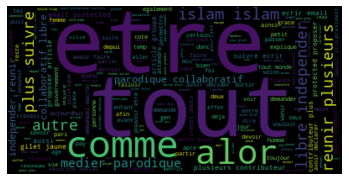

In [ ]:
import matplotlib.pyplot as plt

listToStr_f = ' '.join(map(str, fakeList))
wordcloud_f = WordCloud().generate(listToStr_f)

plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis("off")
plt.show()

## **2. LINGUISTIC FEATURES**

#*2.1 Highly emotional words* 
#*FEEL: French Expanded Emotion Lexicon*

In [ ]:
sentiment_words=pd.read_csv('/content/drive/MyDrive/thesiss/FEEL.csv',delimiter=';')  #LOAD SPANISH EMOTION LEXICON DATASET

In [ ]:
sentiment_words.head()

,id,word,polarity,joy,fear,sadness,anger,surprise,disgust
0,1,à ce endroit là,positive,0,0,0,0,0,0
1,2,à le hâte,negative,0,1,0,0,1,0
2,3,à part,negative,0,0,1,0,0,0
3,4,à pic,negative,0,1,0,0,0,0
4,5,à rallonge,negative,0,0,1,0,0,0


In [ ]:
len(sentiment_words)

14127

*LEMMATIZING THE SEL DATASET*

In [ ]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 952 kB 45.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install -U spacy

     |████████████████████████████████| 6.0 MB 4.7 MB/s            
     |████████████████████████████████| 628 kB 57.1 MB/s            
     |████████████████████████████████| 181 kB 56.9 MB/s            
     |████████████████████████████████| 451 kB 36.5 MB/s            
     |████████████████████████████████| 10.1 MB 44.5 MB/s            
     |████████████████████████████████| 42 kB 1.3 MB/s             
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uni

In [ ]:
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 17.4 MB 400 kB/s            
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import spacy
from spacy import displacy

In [ ]:
nlp = spacy.load('fr_core_news_sm')

In [ ]:
sentiment_words['word_lemma'] = sentiment_words['word'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [ ]:
sentiment_words

,id,word,polarity,joy,fear,sadness,anger,surprise,disgust,word_lemma
0,1,à ce endroit là,positive,0,0,0,0,0,0,à ce endroit là
1,2,à le hâte,negative,0,1,0,0,1,0,à le hâte
2,3,à part,negative,0,0,1,0,0,0,à part
3,4,à pic,negative,0,1,0,0,0,0,à pic
4,5,à rallonge,negative,0,0,1,0,0,0,à rallonge
...,...,...,...,...,...,...,...,...,...,...
14122,14125,zozoter,negative,0,1,1,1,0,0,zozoter
14123,14126,merci,positive,1,0,0,0,0,0,merci
14124,14127,remercier,positive,1,0,0,0,0,0,remercier
14125,14128,remerciment,positive,1,0,0,0,0,0,remerciment


**2.1.1 POSITIVE AND NEGATIVE WORDS AND EXPRESSIONS**

In [ ]:
positive_words=sentiment_words[sentiment_words['polarity']=='positive']#.to_list()

In [ ]:
#positive_words

In [ ]:
negative_words=sentiment_words[sentiment_words['polarity']=='negative']

In [ ]:
#negative_words

*CALCULATE THE NUMBER OF **POSITIVE** WORDS IN THE ORIGINAL DATASET*

In [ ]:
def calculate_count(row):
    neg_counter=0
    pos_counter=0
    for word in row['clean_with_stopwords'].split():
        if word in negative_words['word_lemma'].to_list():
            neg_counter+=1  
        elif word in positive_words['word_lemma'].to_list():
            pos_counter+=1  
            
    return pd.Series([neg_counter,pos_counter],index=['neg','pos'])
            
data1=pd.concat((data,data.apply(calculate_count,axis=1)),axis=1)

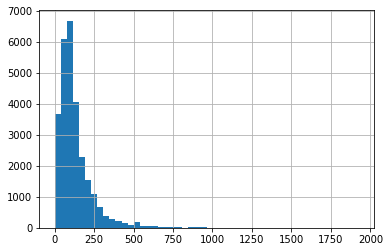

In [ ]:
data1['total']=data1['neg']+data1['pos']
data1['total'].hist(bins=50)

In [ ]:
data1['total'].value_counts()

79      234
86      217
93      217
69      216
81      210
       ... 
658       1
694       1
594       1
726       1
1455      1
Name: total, Length: 746, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39b8032c50>,
      dtype=object)

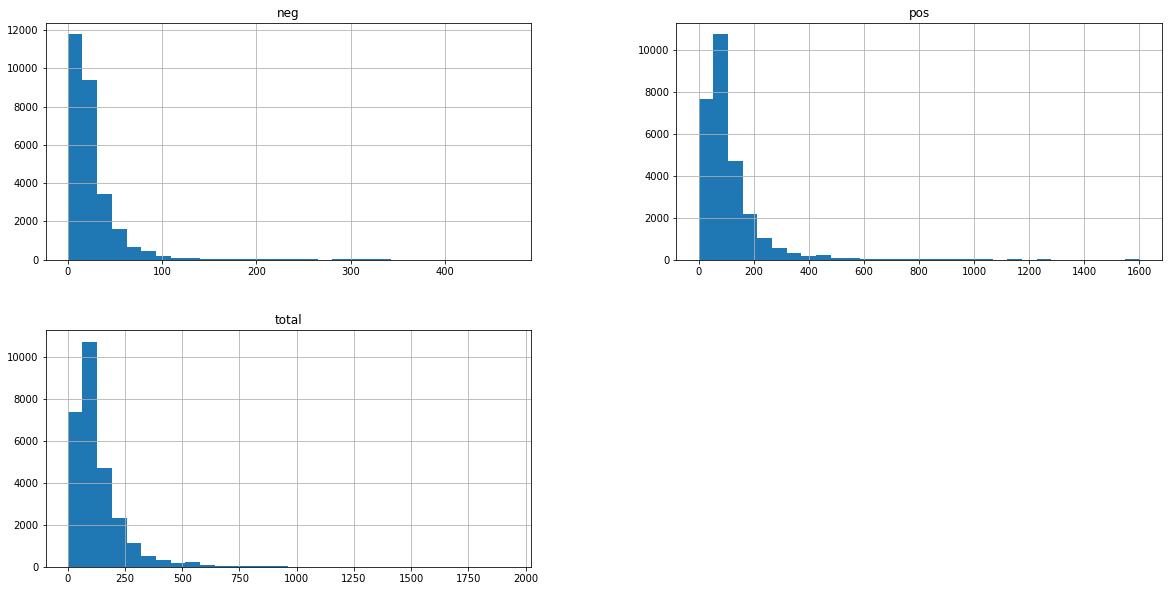

In [ ]:
data1[['neg','pos','total']].hist(bins=30,figsize=(20,10))

In [ ]:
data= data1

*TOTAL NUMBER OF WORDS IN THE WHOLE CORPUS*

In [ ]:
complete_corpus=" ".join(list(data['clean_with_stopwords'].values)) 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
total_words=len(nltk.word_tokenize(complete_corpus))
total_words

10820160

*TOTAL NUMBER OF WORDS PER ARTICLE*

In [ ]:
data['clean_with_stopwords'].str.len()

0        1418
1        2239
2        2200
3        1634
4         604
         ... 
27811    1650
27812     770
27813    1141
27814    1174
27815     858
Name: clean_with_stopwords, Length: 27816, dtype: int64

In [ ]:
data.groupby(by='Fake').mean()

,neg,pos,total
Fake,,,
0,27.644910,123.442119,151.087028
1,21.164285,87.822600,108.986885


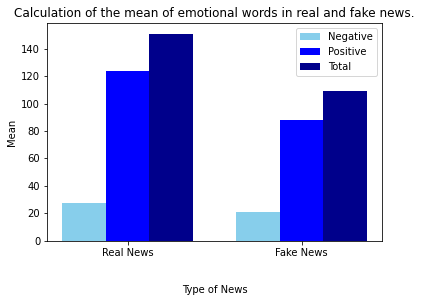

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
  
xvals = [27.644910, 21.164285]
bar1 = plt.bar(ind, xvals, width, color = 'skyblue')
  
yvals = [123.442119, 87.822600]
bar2 = plt.bar(ind+width, yvals, width, color= 'blue')
  
zvals = [151.087028, 108.986885]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'darkblue')
  
plt.xlabel('\n\nType of News')
plt.ylabel('Mean')
plt.title("Calculation of the mean of emotional words in real and fake news.")
plt.xticks(ind+width,['Real News', 'Fake News'])
plt.legend( (bar1, bar2, bar3), ('Negative', 'Positive', 'Total') )
plt.show()

*CALCULATE NORMALIZED FREQUENCY*

In [ ]:
data['emotion']=data['total']/data['clean_with_stopwords'].str.len() # Divide the amount of positive and negative words / total number of words per article

In [ ]:
data

,Fake,text,clean_with_stopwords,final_clean,neg,pos,total,emotion
0,0,Il tente d'incendier sa femme : elle est indem...,il tente de incendier son femme lui être indem...,tente incendier femme indemne gravement bruler...,31,73,104,0.073343
1,0,"Ça y est, Renaud a fait son retour sur scène !...",cela y être renaud avoir faire son retour sur ...,etre renaud avoir faire retour scene octobre a...,18,143,161,0.071907
2,0,"Avec son tailleur rouge, quel message a voulu ...",avec son tailleur rouge quel message avoir vou...,tailleur rouge message avoir vouloir envoyer h...,34,114,148,0.067273
3,0,Foot-Ligue 1 : tous les résultats de la 8ème j...,foot ligue tout le résultat de le èm journée h...,foot ligue tout resultat eme journee octobre m...,16,64,80,0.048960
4,0,× S'abonner au podcast \nVous pouvez vous abon...,se abonner au podcast vous pouvoir vous abonne...,abonner podcast pouvoir abonner telechargement...,6,15,21,0.034768
...,...,...,...,...,...,...,...,...
27811,1,97% de Libanaises refaites : L’ONU demande au ...,pourcent de libanais refaire l onu demande au ...,pourcent libanais refaire onu demande liban ar...,30,73,103,0.062424
27812,1,Un réfugié syrien humilie et empêche une famil...,un réfugié syrien humilier et empêche un famil...,refugier syrien humilier empeche famill rom tr...,15,26,41,0.053247
27813,1,Mehdi Meklat lance une banane à Christiane Tau...,mehdi meklat lance un banane à christiane taub...,mehdi meklat lance banane christiane taubira a...,11,56,67,0.058720
27814,1,"En visite en Afghanistan, Marine Le Pen refuse...",en visite en afghanistan marine le pen refuse ...,visite afghanistan marine pen refuse participe...,12,60,72,0.061329


*MAXIMUM NUMBER OF NEGATIVE WORDS IN AN ARTICLE*

In [ ]:
data['neg'].max()

468

*MAXIMUM NUMBER OF POSITIVE WORDS IN AN ARTICLE*

In [ ]:
data['pos'].max()

1601

*MAXIMUM NUMBER OF NEGATIVE AND POSITIVE WORDS IN AN ARTICLE*

In [ ]:
data['total'].max()

1927

#*2.2 Slang and profanity words*

*LOAD A DATASET OF SLANG AND PROFANITY WORDS COMPILED MANUALLY FROM DIFFERENT WEBSITES*

http://www.languagerealm.com/french/frenchslang_z.php

In [ ]:
slang_words=pd.read_csv('/content/drive/MyDrive/thesiss/informality.csv',header=None,encoding = "utf-8")[0]
slang_words

0        à armes égales
1        à belles dents
2        à bout portant
3       à bride abattue
4            à cause de
             ...       
1923         ça déchire
1924          ça marche
1925        c'est clair
1926          c'est nul
1927                NaN
Name: 0, Length: 1928, dtype: object

In [ ]:
slang_words.dropna(inplace=True)

*LEMMATIZATION*

In [ ]:
slang_words = slang_words.apply(lambda x: " ".join([y.lemma_ for y in nlp(x)])) 

*CALCULATE NORMALIZED FREQUENCY:* **SLANG WORDS PER ARTICLE /TOTAL NUMBER OF TOKENS PER ARTICLE** 

In [ ]:
def slang_prob(text):
    slang_counter=0
    for word in text.lower().split():
        if word in slang_words.to_list():
            slang_counter+=1
    if slang_counter > 1:
        return slang_counter/len(text.lower().split())
    else:
        return 0

In [ ]:
data['slang_prob'] = data['clean_with_stopwords'].apply(lambda x: slang_prob(x))
#data.head()

In [ ]:
data['slang_prob'].describe()

count    27816.000000
mean         0.032545
std          0.018639
min          0.000000
25%          0.021583
50%          0.031128
75%          0.042555
max          0.488584
Name: slang_prob, dtype: float64

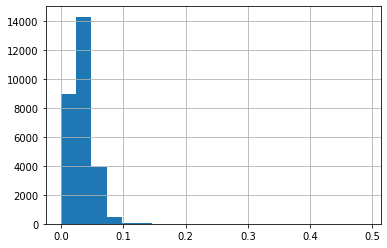

In [ ]:
data['slang_prob'].hist(bins=20)

In [ ]:
data['slang_prob'].max()

0.4885844748858447

#*2.3 Calculate number of extra linguistic-based features*

*CHARACTER AND WORD COUNT, TITLE AND UPPERCASE WORD COUNT, PUNCTUATION AND WORD DENSITY*

In [ ]:
import pandas, xgboost, numpy, textblob, string

data['char_count'] = data['final_clean'].apply(len)
data['word_count'] = data['final_clean'].apply(lambda x: len(x.split()))
data['title_word_count'] = data['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data['upper_case_word_count'] = data['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
data['punctuation_count'] = data['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
data['word_density'] = data['char_count'] / (data['word_count']+1)

In [ ]:
data['word_count'].describe()

count    27816.000000
mean       214.123921
std        195.342805
min          2.000000
25%        105.000000
50%        164.000000
75%        258.000000
max       3521.000000
Name: word_count, dtype: float64

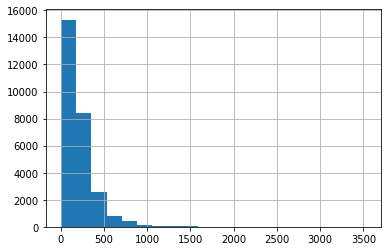

In [ ]:
data['word_count'].hist(bins=20)

In [ ]:
data['word_density'].describe()

count    27816.000000
mean         7.553205
std          1.092988
min          4.625000
25%          7.298076
50%          7.553805
75%          7.797886
max        104.672131
Name: word_density, dtype: float64

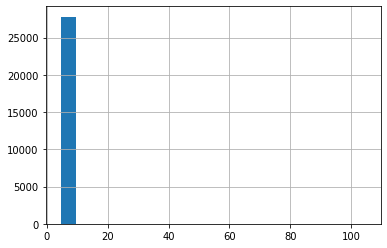

In [ ]:
data['word_density'].hist(bins=20)

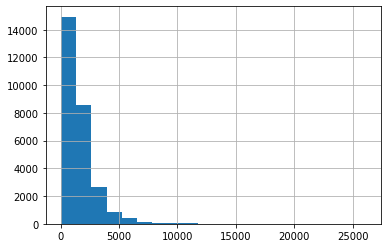

In [ ]:
data['char_count'].hist(bins=20)

In [ ]:
data.groupby(by='Fake').mean()

,neg,pos,total,emotion,slang_prob,char_count,word_count,title_word_count,upper_case_word_count,punctuation_count,word_density
Fake,,,,,,,,,,,
0,27.644910,123.442119,151.087028,0.057244,0.028984,1942.899467,253.356516,54.172181,5.217346,91.891815,7.616377
1,21.164285,87.822600,108.986885,0.058616,0.035821,1339.218886,178.027335,33.213295,3.215020,46.133430,7.495084


*VISUALIZATION*

In [ ]:
data

,Fake,text,clean_with_stopwords,final_clean,neg,pos,total,emotion,slang_prob,char_count,word_count,title_word_count,upper_case_word_count,punctuation_count,word_density
0,0,Il tente d'incendier sa femme : elle est indem...,il tente de incendier son femme lui être indem...,tente incendier femme indemne gravement bruler...,31,73,104,0.073343,0.067460,993,133,19,4,57,7.410448
1,0,"Ça y est, Renaud a fait son retour sur scène !...",cela y être renaud avoir faire son retour sur ...,etre renaud avoir faire retour scene octobre a...,18,143,161,0.071907,0.057143,1624,239,47,3,110,6.766667
2,0,"Avec son tailleur rouge, quel message a voulu ...",avec son tailleur rouge quel message avoir vou...,tailleur rouge message avoir vouloir envoyer h...,34,114,148,0.067273,0.050667,1696,226,55,5,94,7.471366
3,0,Foot-Ligue 1 : tous les résultats de la 8ème j...,foot ligue tout le résultat de le èm journée h...,foot ligue tout resultat eme journee octobre m...,16,64,80,0.048960,0.014134,1267,171,56,6,69,7.366279
4,0,× S'abonner au podcast \nVous pouvez vous abon...,se abonner au podcast vous pouvoir vous abonne...,abonner podcast pouvoir abonner telechargement...,6,15,21,0.034768,0.000000,437,47,7,2,35,9.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27811,1,97% de Libanaises refaites : L’ONU demande au ...,pourcent de libanais refaire l onu demande au ...,pourcent libanais refaire onu demande liban ar...,30,73,103,0.062424,0.017794,1263,161,20,2,28,7.796296
27812,1,Un réfugié syrien humilie et empêche une famil...,un réfugié syrien humilier et empêche un famil...,refugier syrien humilier empeche famill rom tr...,15,26,41,0.053247,0.028986,573,75,10,1,17,7.539474
27813,1,Mehdi Meklat lance une banane à Christiane Tau...,mehdi meklat lance un banane à christiane taub...,mehdi meklat lance banane christiane taubira a...,11,56,67,0.058720,0.015707,886,114,37,0,19,7.704348
27814,1,"En visite en Afghanistan, Marine Le Pen refuse...",en visite en afghanistan marine le pen refuse ...,visite afghanistan marine pen refuse participe...,12,60,72,0.061329,0.034483,863,106,29,0,16,8.065421


## **3. VECTORISING**

DEFINING 'Y' VARIABLE

In [ ]:
Y_train_label = data['Fake']

*CONCATENATE THE DIFFERENT LINGUISTIC ATTRIBUTES*

In [ ]:
X_train_counts_total = data[['final_clean','slang_prob','emotion']]

*SPLIT DATA INTO TRAIN, TEST AND VALIDATION SETS*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_counts_total, Y_train_label, test_size=0.2, stratify=Y_train_label,random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train,random_state=42) 

In [ ]:
from collections import Counter
Counter(y_val)

Counter({0: 1067, 1: 1159})

#*3.2 COUNT VECTORIZER*

In [ ]:
X_train.shape

(20026, 3)

In [ ]:
X_val.shape

(2226, 3)

In [ ]:
X_test.shape

(5564, 3)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000, max_df=0.8) # unigram
count_vect.fit(data['final_clean'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train['final_clean'])
xvalid_count =  count_vect.transform(X_val['final_clean'])
xtest_count =  count_vect.transform(X_test['final_clean'])

In [ ]:
# Concatenate additional 2 columns    
xtrain_count_complete=np.concatenate((xtrain_count.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_count_complete=np.concatenate((xvalid_count.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_count_complete=np.concatenate((xtest_count.toarray(),X_test.iloc[:,1:].values),axis=1)

In [ ]:
# Concatenate  all lexical features 
xtrain_count_all_features=np.concatenate((xtrain_count_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_count_all_features=np.concatenate((xvalid_count_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_count_all_features=np.concatenate((xtest_count_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

In [ ]:
print(count_vect.vocabulary_)

{'tente': 4607, 'incendier': 2344, 'femme': 1913, 'bruler': 609, 'octobre': 3189, 'mari': 2820, 'tenter': 4608, 'sur': 4512, 'partage': 3324, 'boire': 549, 'homme': 2252, 'instance': 2412, 'divorce': 1469, 'appartement': 244, 'essence': 1754, 'propre': 3731, 'vetement': 4864, 'prendre': 3613, 'feu': 1926, 'retour': 4079, 'etre': 1782, 'faire': 1882, 'attendre': 345, 'grievement': 2165, 'nord': 3134, 'italie': 2488, 'epouse': 1728, 'vouloir': 4955, 'quitter': 3805, 'rapporter': 3847, 'samedi': 4202, 'media': 2886, 'local': 2699, 'vendredi': 4844, 'fin': 1953, 'apresmidi': 267, 'violent': 4899, 'dispute': 1454, 'eclater': 1548, 'entre': 1702, 'deux': 1380, 'conjoint': 1034, 'tout': 4690, 'resider': 4046, 'milan': 2961, 'supporter': 4507, 'idee': 2290, 'separation': 4292, 'saisir': 4190, 'epous': 1727, 'avant': 402, 'allumer': 163, 'troisieme': 4745, 'degre': 1284, 'elan': 1598, 'sauter': 4224, 'temps': 4598, 'situer': 4347, 'premier': 3610, 'etage': 1767, 'suivre': 4498, 'peu': 3429, 'et

#*3.3 TF-IDF*

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

*WORD LEVEL*

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=5000, max_df=0.8) #token_pattern=r'\w{1,}'
tfidf_vect.fit(data['final_clean'])
xtrain_tfidf =  tfidf_vect.transform(X_train['final_clean'])
xvalid_tfidf =  tfidf_vect.transform(X_val['final_clean'])
xtest_tfidf =  tfidf_vect.transform(X_test['final_clean'])

#  word level tf-idf --> Concatenate additional 2 columns
xtrain_tfidf_complete=np.concatenate((xtrain_tfidf.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_tfidf_complete=np.concatenate((xvalid_tfidf.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_tfidf_complete=np.concatenate((xtest_tfidf.toarray(),X_test.iloc[:,1:].values),axis=1)

In [ ]:
# Concatenate  all lexical features 
xtrain_tfidf_all_features=np.concatenate((xtrain_tfidf_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_tfidf_all_features=np.concatenate((xvalid_tfidf_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_tfidf_all_features=np.concatenate((xtest_tfidf_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

*N-GRAM LEVEL*

In [ ]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features=5000, max_df=0.8) #token_pattern=r'\w{1,}'
tfidf_vect_ngram.fit(data['final_clean'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train['final_clean'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_val['final_clean'])
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test['final_clean'])

In [ ]:
# ngram level tf-idf --> Concatenate additional 2 columns
xtrain_tfidf_ngram_complete=np.concatenate((xtrain_tfidf_ngram.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_tfidf_ngram_complete=np.concatenate((xvalid_tfidf_ngram.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_tfidf_ngram_complete=np.concatenate((xtest_tfidf_ngram.toarray(),X_test.iloc[:,1:].values),axis=1)

In [ ]:
# Concatenate all lexical features 
xtrain_tfidf_all_features_ngrams=np.concatenate((xtrain_tfidf_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_tfidf_all_features_ngrams=np.concatenate((xvalid_tfidf_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_tfidf_all_features_ngrams=np.concatenate((xtest_tfidf_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

*CHARACTER LEVEL*

In [ ]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=5000, max_df=0.8) #token_pattern=r'\w{1,}'
tfidf_vect_ngram_chars.fit(data['final_clean'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train['final_clean']) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_val['final_clean']) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test['final_clean']) 

In [ ]:
# characters level --> Concatenate additional 2 columns
xtrain_tfidf_ngram_chars_complete=np.concatenate((xtrain_tfidf_ngram_chars.toarray(),X_train.iloc[:,1:].values),axis=1)
xvalid_tfidf_ngram_chars_complete=np.concatenate((xvalid_tfidf_ngram_chars.toarray(),X_val.iloc[:,1:].values),axis=1)
xtest_tfidf_ngram_chars_complete=np.concatenate((xtest_tfidf_ngram_chars.toarray(),X_test.iloc[:,1:].values),axis=1)

In [ ]:
# Concatenate  all lexical features  
xtrain_tfidf_all_features_chars=np.concatenate((xtrain_tfidf_complete,data.loc[X_train.index,'word_count':'word_density'].values),axis=1)
xvalid_tfidf_all_features_chars=np.concatenate((xvalid_tfidf_complete,data.loc[X_val.index,'word_count':'word_density'].values),axis=1)
xtest_tfidf_all_features_chars=np.concatenate((xtest_tfidf_complete,data.loc[X_test.index,'word_count':'word_density'].values),axis=1)

## **4. TRAIN THE LR MODEL**

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, metrics

In [ ]:
import itertools # construct specialized tools
import matplotlib.pyplot as plt

#*4.1 CONFUSION MATRIX*


In [ ]:
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

#*4.2 METRICS*

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid, y_val,is_neural_net=False):
    # fit the training dataset on the classifier
    classifier_name = classifier
    classifier_name.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(y_val,predictions)    
    confusion = confusion_matrix(y_val,predictions)
    class_labels = classifier.classes_

    print('Confusion Matrix')
    print(confusion)
    plt.figure()
    plot_confusion_matrix(confusion, classes = ['Fake=1','True=0'], normalize = False,  title = 'Confusion matrix')
    plt.show()
    
    return print(classification_report(predictions, y_val, target_names=['Fake', 'True'],digits=4),acc)

## **5. RESULTS**

#*5.1 ACCURACY ONLY USING THE TEXT*

Confusion Matrix
[[1003   64]
 [  47 1112]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


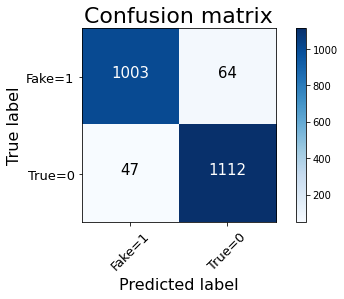

              precision    recall  f1-score   support

        Fake     0.9400    0.9552    0.9476      1050
        True     0.9594    0.9456    0.9525      1176

    accuracy                         0.9501      2226
   macro avg     0.9497    0.9504    0.9500      2226
weighted avg     0.9503    0.9501    0.9502      2226
 0.9501347708894878
LR, Count Vectors:  None
Confusion Matrix
[[1012   55]
 [  60 1099]]


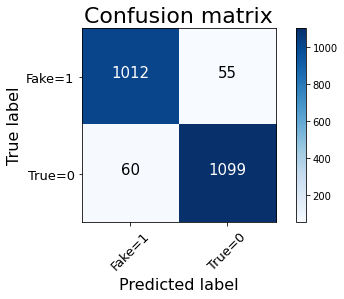

              precision    recall  f1-score   support

        Fake     0.9485    0.9440    0.9462      1072
        True     0.9482    0.9523    0.9503      1154

    accuracy                         0.9483      2226
   macro avg     0.9483    0.9482    0.9483      2226
weighted avg     0.9483    0.9483    0.9483      2226
 0.9483378256963163
LR, WordLevel TF-IDF:  None
Confusion Matrix
[[ 968   99]
 [ 102 1057]]


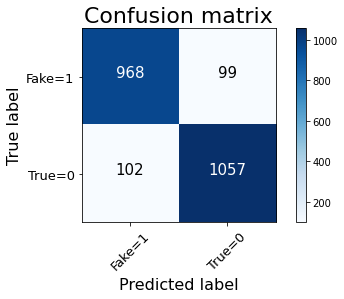

              precision    recall  f1-score   support

        Fake     0.9072    0.9047    0.9059      1070
        True     0.9120    0.9144    0.9132      1156

    accuracy                         0.9097      2226
   macro avg     0.9096    0.9095    0.9096      2226
weighted avg     0.9097    0.9097    0.9097      2226
 0.9097035040431267
LR, N-Gram Vectors:  None
Confusion Matrix
[[ 981   86]
 [  84 1075]]


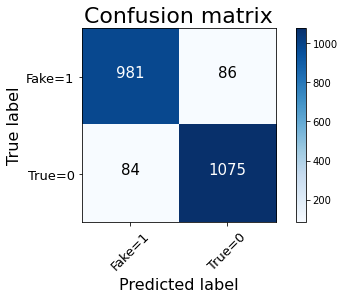

              precision    recall  f1-score   support

        Fake     0.9194    0.9211    0.9203      1065
        True     0.9275    0.9259    0.9267      1161

    accuracy                         0.9236      2226
   macro avg     0.9235    0.9235    0.9235      2226
weighted avg     0.9236    0.9236    0.9236      2226
 0.9236298292902066
LR, CharLevel Vectors:  None


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xvalid_count,y_val)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xvalid_tfidf,y_val)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xvalid_tfidf_ngram,y_val)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars,y_val)
print ("LR, CharLevel Vectors: ", accuracy)

#*5.2 SLANG + EMOTIONAL WORDS*

Confusion Matrix
[[1004   63]
 [  47 1112]]


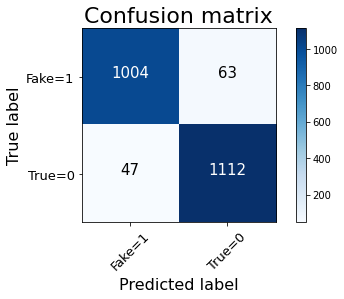

              precision    recall  f1-score   support

        Fake     0.9410    0.9553    0.9481      1051
        True     0.9594    0.9464    0.9529      1175

    accuracy                         0.9506      2226
   macro avg     0.9502    0.9508    0.9505      2226
weighted avg     0.9507    0.9506    0.9506      2226
 0.9505840071877808
LR, Count Vectors:  None
Confusion Matrix
[[1012   55]
 [  60 1099]]


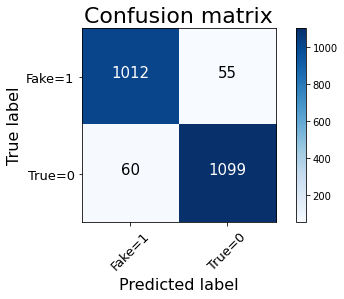

              precision    recall  f1-score   support

        Fake     0.9485    0.9440    0.9462      1072
        True     0.9482    0.9523    0.9503      1154

    accuracy                         0.9483      2226
   macro avg     0.9483    0.9482    0.9483      2226
weighted avg     0.9483    0.9483    0.9483      2226
 0.9483378256963163
LR, WordLevel TF-IDF:  None
Confusion Matrix
[[ 962  105]
 [  97 1062]]


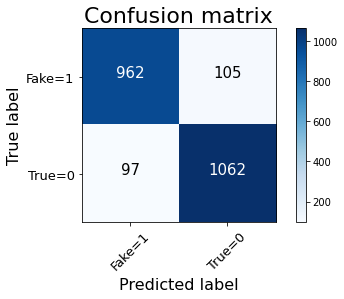

              precision    recall  f1-score   support

        Fake     0.9016    0.9084    0.9050      1059
        True     0.9163    0.9100    0.9132      1167

    accuracy                         0.9093      2226
   macro avg     0.9090    0.9092    0.9091      2226
weighted avg     0.9093    0.9093    0.9093      2226
 0.9092542677448338
LR, N-Gram Vectors:  None
Confusion Matrix
[[ 981   86]
 [  84 1075]]


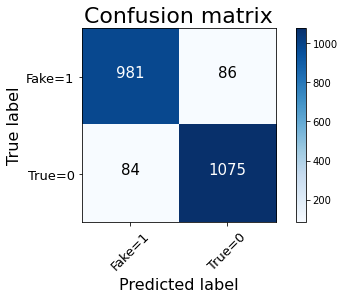

              precision    recall  f1-score   support

        Fake     0.9194    0.9211    0.9203      1065
        True     0.9275    0.9259    0.9267      1161

    accuracy                         0.9236      2226
   macro avg     0.9235    0.9235    0.9235      2226
weighted avg     0.9236    0.9236    0.9236      2226
 0.9236298292902066
LR, CharLevel Vectors:  None


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(max_iter=1000), xtrain_count_complete, y_train, xvalid_count_complete, y_val)
print ("LR, Count Vectors: ", accuracy)

#Linear Classifier on Word Level TF IDF Vectors   
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_complete, y_train, xvalid_tfidf_complete, y_val)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_complete, y_train, xvalid_tfidf_ngram_complete, y_val)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xvalid_tfidf_ngram_chars, y_val)
print ("LR, CharLevel Vectors: ", accuracy)

# *5.3 LEXICAL FEATURES*

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix
[[ 980   87]
 [  49 1110]]


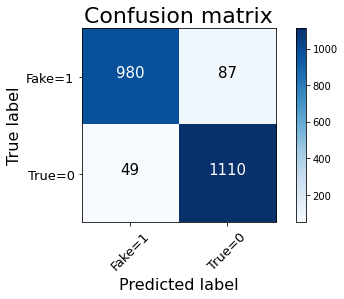

              precision    recall  f1-score   support

        Fake     0.9185    0.9524    0.9351      1029
        True     0.9577    0.9273    0.9423      1197

    accuracy                         0.9389      2226
   macro avg     0.9381    0.9398    0.9387      2226
weighted avg     0.9396    0.9389    0.9390      2226
 0.9389038634321654
LR, Count Vectors:  None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix
[[1002   65]
 [  66 1093]]


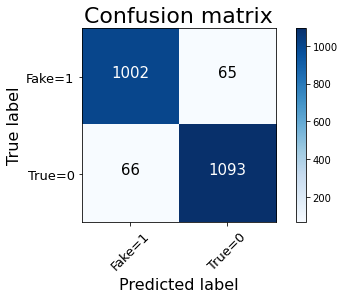

              precision    recall  f1-score   support

        Fake     0.9391    0.9382    0.9386      1068
        True     0.9431    0.9439    0.9435      1158

    accuracy                         0.9412      2226
   macro avg     0.9411    0.9410    0.9411      2226
weighted avg     0.9411    0.9412    0.9411      2226
 0.9411500449236299
LR, WordLevel TF-IDF:  None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix
[[1002   65]
 [  66 1093]]


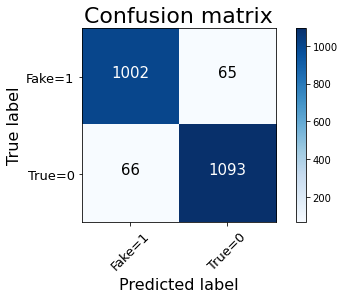

              precision    recall  f1-score   support

        Fake     0.9391    0.9382    0.9386      1068
        True     0.9431    0.9439    0.9435      1158

    accuracy                         0.9412      2226
   macro avg     0.9411    0.9410    0.9411      2226
weighted avg     0.9411    0.9412    0.9411      2226
 0.9411500449236299
LR, N-Gram Vectors:  None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix
[[1002   65]
 [  66 1093]]


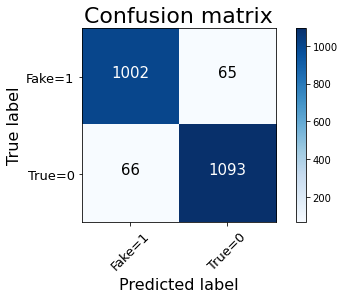

              precision    recall  f1-score   support

        Fake     0.9391    0.9382    0.9386      1068
        True     0.9431    0.9439    0.9435      1158

    accuracy                         0.9412      2226
   macro avg     0.9411    0.9410    0.9411      2226
weighted avg     0.9411    0.9412    0.9411      2226
 0.9411500449236299
LR, CharLevel Vectors:  None


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count_all_features, y_train, xvalid_count_all_features, y_val)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors  
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_all_features, y_train, xvalid_tfidf_all_features, y_val)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_all_features_ngrams, y_train, xvalid_tfidf_all_features_ngrams, y_val)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_all_features_chars, y_train, xvalid_tfidf_all_features_chars, y_val)
print ("LR, CharLevel Vectors: ", accuracy)

# *MOST IMPORTANT VECTORS IN FAKE AND REAL ARTICLES + INSTANCES OF MISS-CLASSIFIED ARTICLES*

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def samples(classifier, feature_vector_train, label, feature_vector_test, y_test,is_neural_net=False):
    # fit the training dataset on the classifier
    classifier_name = classifier
    classifier_name.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(y_test,predictions)    
    confusion = confusion_matrix(y_test,predictions)
    
    class_labels = classifier.classes_
    feature_names = count_vect.get_feature_names()    #MOST IMPORTANT FEATURES FOR THE CLASSIFICATION TASK (IN GENERAL: FAKE AND TRUE NEWS)
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:40]  #Sorts coefficients according to their significance for the model
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-40:]

    for coef, feat in topn_class1:
        print('True', coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print('Fake', coef, feat)
        


    false_positives=[]

    false_negatives=[]


    for i,y_test_sample in enumerate(y_test):   # print samples of FN and FN
        if y_test_sample==0 and predictions[i]==1 and len(false_positives)<5:
            dataset_pos=X_test.iloc[i].name
            false_positives.append(data.loc[dataset_pos,'text'])

            
        if y_test_sample==1 and predictions[i]==0 and len(false_negatives)<5:
            dataset_pos=X_test.iloc[i].name
            false_negatives.append(data.loc[dataset_pos,'text'])

    print('False Positive Examples')
    for ii in false_positives:
      print(ii) 
      print('\n')

    print('\nFalse Negative Examples')
    for ii in false_negatives:
      print(ii) 
      print('\n')

    
    return print(classification_report(predictions, y_test, target_names=['Fake', 'True'],digits=4),acc)

**CV**

In [ ]:
accuracy = samples(linear_model.LogisticRegression(), xtrain_count, y_train, xvalid_count, y_val)
print ("LR, Count Vectors: ", accuracy)

True -3.588170602474688 octobre
True -2.259544542832512 actualite
True -2.1269614224721454 jusque
True -2.0426236485953395 lire
True -1.6134983928134627 publier
True -1.4541828876001095 belga
True -1.362818506787409 septembre
True -1.1845625130922102 accueil
True -1.1716405833935615 abonner
True -1.1461419327995863 mardi
True -1.0779648991993733 deuxieme
True -1.0575400841064573 imprimer
True -1.0355014179582342 parisien
True -0.9414185817878169 six
True -0.9308597665330236 decembre
True -0.9187641071567262 standard
True -0.902821878509805 logement
True -0.8955565265449388 dix
True -0.8873536239260276 bruxelle
True -0.8611498539493562 recette
True -0.8527554555864902 notamment
True -0.8455802334558905 anderlecht
True -0.8365916291271944 federal
True -0.8294494636499281 mobile
True -0.829373695452074 britannique
True -0.8287892285169507 aout
True -0.8103785008304912 novembre
True -0.7998841363359865 quatre
True -0.7849331291975286 rencontre
True -0.7814518266610496 actu
True -0.77865837

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
